In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [115]:
df['major_discipline'].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [22]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [23]:
cols = [var for var in df.columns if df[var].isnull().mean()*100 < 5 and df[var].isnull().mean()*100 > 0]

In [24]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [71]:
missing = df[cols]

In [72]:
missing = missing.dropna()

In [73]:
missing.shape

(17182, 5)

In [65]:
miss = df.size - df.isnull().sum().sum()

In [68]:
print(len(missing) / len(df))

0.8968577095730244


<Axes: ylabel='Frequency'>

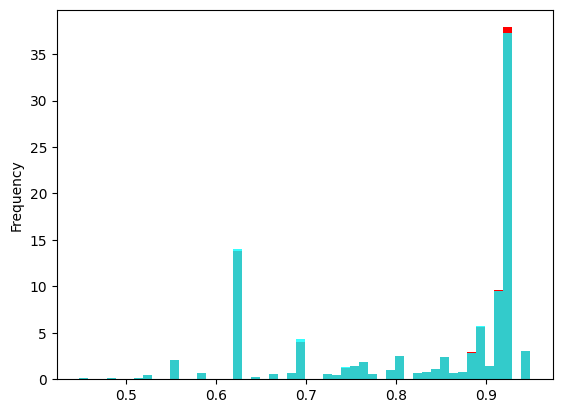

In [106]:
# city dev index
missing['city_development_index'].plot(kind='hist',color='red', bins=50, density=True)
df['city_development_index'].plot(kind='hist', color='cyan', bins=50, density=True, alpha=0.8)

<Axes: ylabel='Frequency'>

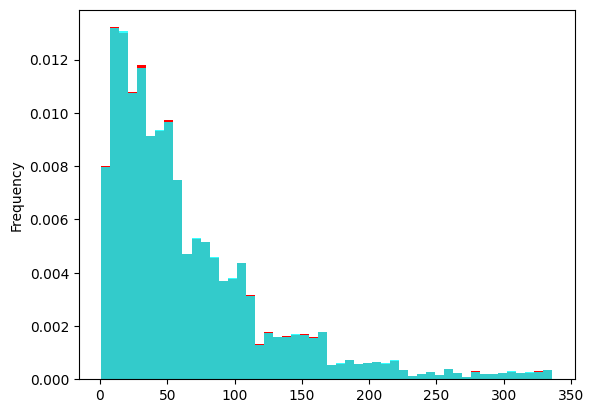

In [107]:
# training hours
missing['training_hours'].plot(kind='hist',color='red', bins=50, density=True)
df['training_hours'].plot(kind='hist', color='cyan', bins=50, density=True, alpha=0.8)

## for numerical -- by plotting graphs
## for categorical -- by comparing the ratio

In [113]:
# education level
temp = pd.concat([
    df['education_level'].value_counts() / len(df),
    missing['education_level'].value_counts() / len(missing)
], axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [118]:
# enrolled university
temp = pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    missing['enrolled_university'].value_counts() / len(missing)
], axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [120]:
comp = pd.concat([
    missing['training_hours'].describe(),
    df['training_hours'].describe(),
], axis=1)
comp.columns = ['original', 'cca']
comp

,original,cca
count,17182.000000,18392.000000
mean,65.055872,65.185787
std,59.800788,59.885626
min,1.000000,1.000000
25%,23.000000,23.000000
50%,47.000000,47.000000
75%,88.000000,88.000000
max,336.000000,336.000000


### conclusion - the missing data is MCAR and we can perform CCA because it is <5%  